# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import  requests
import re 
import tensorflow as tf
import os
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# 데이터 불러오기

In [2]:
    file_path = './로또.csv'
    data = pd.read_csv(file_path)

    print(data) 

       회차         추첨일  첫번째  두번째  세번째  네번째  다섯번째  여섯번째  보너스
0       1  2002-12-07   10   23   29   33    37    40   16
1       2  2002-12-14    9   13   21   25    32    42    2
2       3  2002-12-21   11   16   19   21    27    31   30
3       4  2002-12-28   14   27   30   31    40    42    2
4       5  2003-01-04   16   24   29   40    41    42    3
...   ...         ...  ...  ...  ...  ...   ...   ...  ...
1148  938  2020-11-21    4    8   10   16    31    36    9
1149  939  2020-11-28    4   11   28   39    42    45    6
1150  940  2020-12-05    3   15   20   22    24    41   11
1151  941  2020-12-12   12   14   25   27    39    40   35
1152  942  2020-12-19   10   12   18   35    42    43   39

[1153 rows x 9 columns]


# 데이터 전처리

In [3]:
data_frame = pd.DataFrame(data,columns=['첫번째','두번째','세번째','네번째','다섯번째','여섯번째','보너스'])
data_frame=data_frame.dropna()
data_frame


,첫번째,두번째,세번째,네번째,다섯번째,여섯번째,보너스
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
1148,4,8,10,16,31,36,9
1149,4,11,28,39,42,45,6
1150,3,15,20,22,24,41,11
1151,12,14,25,27,39,40,35


# 그냥 그려보기

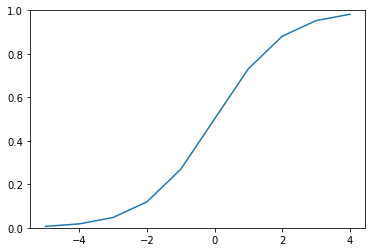

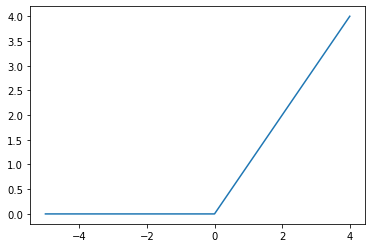

1

In [4]:

def sigmoid(x):
    return 1 /(1+np.exp(-x))

x_=np.arange(-5.0,5.0,1)
x_1=sigmoid(x_)
plt.plot(x_,x_1) 
plt.ylim(-0,1,1.1)
plt.show()

def relu(x):
    return np.maximum(0,x)

x_2=relu(x_)
plt.plot(x_,x_2,label="ReLU")
plt.show()
np.ndim(x_)

In [28]:
train = data_frame[:943]
test=data_frame[943:]  

def make_dataset(data,label,window_size):
    feature_list=[]
    label_list=[]
    for i in range(len(data)-window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
        
    return np.array(feature_list),np.array(label_list)

In [36]:
feature_cols=['첫번째','두번째','세번째','네번째','다섯번째','여섯번째','보너스']
label_cols=['첫번째','두번째','세번째','네번째','다섯번째','여섯번째']
train_feature = train[feature_cols]
train_label=train[label_cols]
test_feature=test[feature_cols]
test_label=test[label_cols]  
train_feature,train_label=make_dataset(train_feature,train_label,16)

In [37]:
x_train,x_valid,y_train,y_valid = train_test_split(train_feature,train_label,test_size=0.2)
x_train.shape,x_valid.shape

((741, 16, 7), (186, 16, 7))

In [38]:
test_feature,test_label=make_dataset(test_feature,test_label,16)  

In [39]:

test_feature.shape,test_label.shape   

((194, 16, 7), (194, 6))

In [40]:
model =Sequential()
model.add(LSTM(16,input_shape=(train_feature.shape[1],train_feature.shape[2]),activation='relu',return_sequences=False))  
model.add(Dense(6))  
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16)                1536      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
Total params: 1,638
Trainable params: 1,638
Non-trainable params: 0
_________________________________________________________________


In [43]:
 
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid))


Train on 741 samples, validate on 186 samples
Epoch 1/100
741/741 [==============================] - 1s 1ms/step - loss: 34.1132 - accuracy: 1.0000 - val_loss: 59.5564 - val_accuracy: 1.0000
Epoch 2/100
741/741 [==============================] - 1s 1ms/step - loss: 33.5954 - accuracy: 1.0000 - val_loss: 58.7643 - val_accuracy: 1.0000
Epoch 3/100
741/741 [==============================] - 1s 1ms/step - loss: 33.2812 - accuracy: 1.0000 - val_loss: 59.9693 - val_accuracy: 1.0000
Epoch 4/100
741/741 [==============================] - 1s 1ms/step - loss: 33.7055 - accuracy: 1.0000 - val_loss: 58.7511 - val_accuracy: 1.0000
Epoch 5/100
741/741 [==============================] - 1s 1ms/step - loss: 33.7233 - accuracy: 1.0000 - val_loss: 59.8313 - val_accuracy: 1.0000
Epoch 6/100
741/741 [==============================] - 1s 1ms/step - loss: 33.9903 - accuracy: 0.9987 - val_loss: 56.8335 - val_accuracy: 1.0000
Epoch 7/100
741/741 [==============================] - 1s 992us/step - loss: 35.8729

Epoch 57/100
741/741 [==============================] - 1s 1ms/step - loss: 31.8580 - accuracy: 0.9987 - val_loss: 56.5350 - val_accuracy: 1.0000
Epoch 58/100
741/741 [==============================] - 1s 1ms/step - loss: 30.7850 - accuracy: 1.0000 - val_loss: 60.2733 - val_accuracy: 0.9946
Epoch 59/100
741/741 [==============================] - 1s 988us/step - loss: 31.5410 - accuracy: 1.0000 - val_loss: 58.9471 - val_accuracy: 1.0000
Epoch 60/100
741/741 [==============================] - 1s 1000us/step - loss: 33.7466 - accuracy: 1.0000 - val_loss: 57.8192 - val_accuracy: 0.9946
Epoch 61/100
741/741 [==============================] - 1s 1ms/step - loss: 33.1096 - accuracy: 0.9987 - val_loss: 58.3284 - val_accuracy: 1.0000
Epoch 62/100
741/741 [==============================] - 1s 1ms/step - loss: 30.9350 - accuracy: 0.9987 - val_loss: 59.7847 - val_accuracy: 1.0000
Epoch 63/100
741/741 [==============================] - 1s 1ms/step - loss: 32.2163 - accuracy: 1.0000 - val_loss: 58.1

In [44]:
pred= model.predict(test_feature)  
print(pred[0])

print(data_frame[943:])


[ 7.862636 15.886109 23.661116 29.771872 35.843994 42.258636]
      첫번째  두번째  세번째  네번째  다섯번째  여섯번째  보너스
943    11   24   32   33    35    40   13
944     6   16   37   38    41    45   18
945     5   10   13   27    37    41    4
946     2   11   17   18    21    27    6
947    13   15   18   24    27    41   11
...   ...  ...  ...  ...   ...   ...  ...
1148    4    8   10   16    31    36    9
1149    4   11   28   39    42    45    6
1150    3   15   20   22    24    41   11
1151   12   14   25   27    39    40   35
1152   10   12   18   35    42    43   39

[210 rows x 7 columns]
